In [41]:
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [44]:
from capacity import CapacityAnalysis
from params import Params

p_ac = Params()
p_ac.set_radio(type='802.11ac')
p_ac.pl_function = p_ac.pl_wifi
ca_ac = CapacityAnalysis(p_ac)

p_ad = Params()
p_ad.set_radio(type='802.11ad_pro')
ca_ad = CapacityAnalysis(p_ad)


p_ad_gal = Params()
p_ad_gal.set_radio(type='802.11ad_pro')
p_ad_gal.f_c = 60
ca_ad_gal = CapacityAnalysis(p_ad_gal)



p_ac_rural = Params()
p_ac_rural.set_radio(type='802.11ac')
p_ac_rural.pl_function = p_ac_rural.pl_wifi_rural
ca_ac_rural = CapacityAnalysis(p_ac_rural)



p_ac_fs = Params()
p_ac_fs.set_radio(type='802.11ac')
p_ac_fs.pl_function = p_ac_fs.pl_fs
ca_ac_fs = CapacityAnalysis(p_ac_fs)


dists = np.array(range(0,20000, 1000)) 
speeds_11ac = np.zeros_like(dists)
speeds_11ad = np.zeros_like(dists)
speeds_11ad_gal = np.zeros_like(dists)
speeds_11ac_rural = np.zeros_like(dists)
speeds_11ac_fs = np.zeros_like(dists)


for i,d in enumerate(dists):
    speeds_11ac[i] = ca_ac.calc_capacity(d)
    speeds_11ad[i] = ca_ad.calc_capacity(d)
    speeds_11ad_gal[i] = ca_ad_gal.calc_capacity(d)
    speeds_11ac_fs[i] = ca_ac_fs.calc_capacity(d)
    speeds_11ac_rural[i] = ca_ac_rural.calc_capacity(d)

# plt.plot(dists/1000,speeds_11ac, label="11ac Suburban")
# plt.plot(dists/1000,speeds_11ad, label="11ad Rural")
# plt.plot(dists/1000,speeds_11ad_gal, label="11ad GAL")
# #plt.plot(dists/1000,speeds_11ac_fs, label="802.11ac fspl")
# #plt.plot(dists/1000,speeds_11ac_rural, label="802.11ac rural")

# plt.xlabel("Distance [km]")
# plt.ylabel("Capacity [Mbps]")
# plt.legend()
# plt.grid(alpha=0.5)
# #plt.ylim(0,500)
# plt.savefig("figures/capacity.pdf")


out = np.array([dists, speeds_11ac/1000, speeds_11ad/1000, speeds_11ad_gal/1000]).T
np.savetxt("latex_figures/capacity_distance.csv", out, delimiter = ",", header="distance, 11ac, 11ad, 11ad_gal", comments="")

In [ ]:
from capacity import CapacityAnalysis
from params import Params

p_ac = Params()
p_ac.set_radio(type='802.11ac')


p_ad = Params()
p_ad.set_radio(type='802.11ad_pro')


p_ad_gal = Params()
p_ad_gal.set_radio(type='802.11ad_pro')
p_ad_gal.f_c=60


dists = np.array(range(0,20000, 100))
pl_11ac = np.zeros_like(dists, dtype=np.float32)
pl_11ad = np.zeros_like(dists, dtype=np.float32)
pl_11ad_gal = np.zeros_like(dists, dtype=np.float32)
pl_11ac_rural = np.zeros_like(dists, dtype=np.float32)
pl_11ac_fs = np.zeros_like(dists, dtype=np.float32)



for i,d in enumerate(dists):
    pl_11ac[i] = p_ac.pl_wifi(d)
    pl_11ad[i] = p_ad.pl_fs(d)
    pl_11ad_gal[i] = p_ad_gal.pl_fs(d)
    pl_11ac_rural[i] = p_ac.pl_wifi_rural(d)
    pl_11ac_fs[i] = p_ac.pl_fs(d)


plt.plot(dists/1000,pl_11ac, label="802.11ac suburban")
plt.plot(dists/1000,pl_11ad, label="802.11ad")
plt.plot(dists/1000,pl_11ad_gal, label="802.11ad GAL")
plt.plot(dists/1000,pl_11ac_fs, label="802.11ac fspl")
plt.plot(dists/1000,pl_11ac_rural, label="802.11ac rural")

plt.xlabel("Distance [km]")
plt.ylabel("Pathloss [dB]")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig("figures/pathloss.pdf")

In [45]:
bws = []
costs = []
n_ant = []
capexes = []
for dev in ['802.11ac', '802.11ad_pro']:
    bw_f = glob.glob(f'processed/{dev}/bw*.csv')
    cost_f = glob.glob(f'processed/{dev}/costs*.csv')
    n_ant_f = glob.glob(f'processed/{dev}/n_ant*.csv')
    capex_f = glob.glob(f'processed/{dev}/capex**.csv')

    for f in bw_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        df.rename(columns={"#ratio": "ratio"}, inplace=True)
        bws.append(df)
    
    for f in cost_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        df.rename(columns={"#cluster_size": "cluster_size"}, inplace=True)
        costs.append(df)
    
    for f in n_ant_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        df.rename(columns={"#ratio": "ratio"}, inplace=True)
        n_ant.append(df)
    
    for f in capex_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        capexes.append(df)


bw_df = pd.concat(bws)
costs_df = pd.concat(costs)
n_ant_df = pd.concat(n_ant)
capex_df = pd.concat(capexes)
costs_df.set_index(['cluster_size', 'mgb', 'ratio', "device"], inplace=True)
bw_df.set_index(["cluster_size", "mgb", "ratio", "device"], inplace=True)
#done #Fix sum that was missing the power consumption
# costs_df['correct_sum'] = costs_df.fiber_cost_mean + costs_df.transport_cost_mean + costs_df.unplanned_cost_mean  + costs_df.power_consumption_mean +costs_df.capex_mean

In [46]:
bw_df

bw_type          bw
cluster_size mgb ratio device                          
50           20  25    802.11ac         max  325.398279
                 50    802.11ac         max  325.663986
                 100   802.11ac         max  324.475802
100          20  25    802.11ac         max  324.946709
                 50    802.11ac         max  326.383297
...                                     ...         ...
             40  50    802.11ad_pro  min_ul  494.867682
                 100   802.11ad_pro  min_ul  415.961874
200          40  25    802.11ad_pro  min_ul  440.426817
                 50    802.11ad_pro  min_ul  412.765013
                 100   802.11ad_pro  min_ul  353.156711

[540 rows x 2 columns]

,cluster_size,mgb,ratio,device,bw_type,bw
0,50,70,25,802.11ad_pro,max,1373.095813
1,50,70,50,802.11ad_pro,max,1377.340211
2,50,70,100,802.11ad_pro,max,1367.095645
3,100,70,25,802.11ad_pro,max,1369.512530
4,100,70,50,802.11ad_pro,max,1382.040899
...,...,...,...,...,...,...
67,100,90,50,802.11ad_pro,min_ul,494.867682
68,100,90,100,802.11ad_pro,min_ul,415.961874
69,200,90,25,802.11ad_pro,min_ul,440.426817
70,200,90,50,802.11ad_pro,min_ul,412.765013


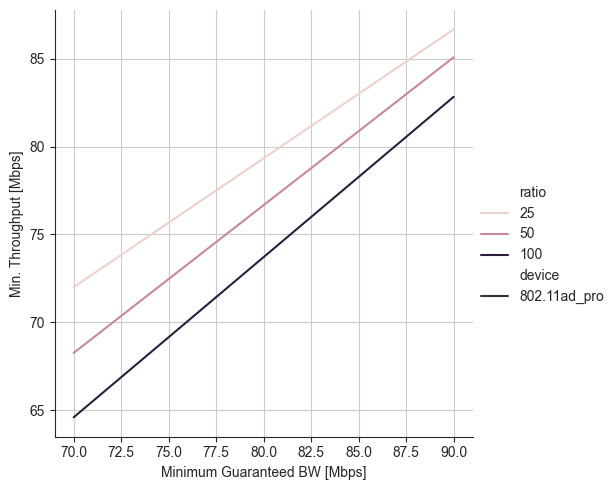

In [9]:
bw_df = bw_df.reset_index()
toplot = bw_df[(((bw_df.cluster_size==100) & (bw_df.device=='802.11ac')) | ((bw_df.cluster_size==50) & (bw_df.device=='802.11ad_pro')) )& (bw_df.bw_type=='min') & (bw_df.mgb <=100)]
sns.set_style("ticks",{'axes.grid' : True})
fg = sns.relplot(data=toplot, x='mgb', hue='ratio', kind='line', style='device', y='bw', facet_kws={'sharey': True, 'sharex': False}, errorbar=('ci', 50))

fg.set_ylabels("Min. Throughput [Mbps]")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/minbw.pdf")

# out = toplot.groupby(['mgb','device', "ratio"]).bw.mean().unstack(['device', 'ratio'])

# #print(out.reset_index())
# out.columns = [f"{c[0]}_{c[1]}" for c in out.columns]
# out.to_csv("latex_figures/thr_capacity.csv")


bw_df

In [10]:
bw_df = bw_df.reset_index()
toplot = bw_df[(((bw_df.cluster_size==100) & (bw_df.device=='802.11ac')) | ((bw_df.cluster_size==50) & (bw_df.device=='802.11ad_pro')) )& (bw_df.bw_type=='max') & (bw_df.mgb <=100)]
sns.set_style("ticks",{'axes.grid' : True})
# fg = sns.relplot(data=toplot, x='mgb', hue='ratio', kind='line', style='device', y='bw', facet_kws={'sharey': True, 'sharex': False})

# fg.set_ylabels("Min. Throughput [Mbps]")
# fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
# plt.savefig("/home/gabriel/git/ODCM/analysis/figures/minbw.pdf")

out = toplot.groupby(['mgb','device', "ratio"]).bw.mean().unstack(['device', 'ratio'])

#print(out.reset_index())
out.columns = [f"{c[0]}_{c[1]}" for c in out.columns]
out.to_csv("latex_figures/thr_capacity_max.csv")

In [6]:
costs_df

fiber_cost_get_min  fiber_cost_get_max  \
cluster_size mgb ratio device                                                 
50           30  25    802.11ac                3.679441            4.905921   
                 50    802.11ac                3.509759            4.679679   
                 100   802.11ac                3.482105            4.642807   
100          30  25    802.11ac                3.888521            5.184695   
                 50    802.11ac                3.490854            4.654472   
...                                                 ...                 ...   
             40  50    802.11ad_pro            4.627903            6.170537   
                 100   802.11ad_pro            4.537729            6.050305   
200          40  25    802.11ad_pro            4.881970            6.509293   
                 50    802.11ad_pro            4.872539            6.496719   
                 100   802.11ad_pro            4.515110            6.020147   

                                     transport_cost_get_min  \
cluster_size mgb ratio device                                 
50           30  25    802.11ac                   12.448144   
                 50    802.11ac                    7.577204   
                 100   802.11ac                    5.353190   
100          30  25    802.11ac                   13.316923   
                 50    802.11ac                    7.435435   
...                                                     ...   
             40  50    802.11ad_pro                9.160530   
                 100   802.11ad_pro                4.854979   
200          40  25    802.11ad_pro               13.400680   
                 50    802.11ad_pro                9.978443   
                 100   802.11ad_pro                4.866431   

                                     transport_cost_get_max  \
cluster_size mgb ratio device                                 
50           30  25    802.11ac                   12.448144   
                 50    802.11ac                    7.577204   
                 100   802.11ac                    5.353190   
100          30  25    802.11ac                   13.316923   
                 50    802.11ac                    7.435435   
...                                                     ...   
             40  50    802.11ad_pro                9.160530   
                 100   802.11ad_pro                4.854979   
200          40  25    802.11ad_pro               13.400680   
                 50    802.11ad_pro                9.978443   
                 100   802.11ad_pro                4.866431   

                                     unplanned_cost_get_min  \
cluster_size mgb ratio device                                 
50           30  25    802.11ac                    1.521397   
                 50    802.11ac                    1.286172   
                 100   802.11ac                    1.019503   
100          30  25    802.11ac                    1.550645   
                 50    802.11ac                    1.340244   
...                                                     ...   
             40  50    802.11ad_pro                1.296020   
                 100   802.11ad_pro                0.990904   
200          40  25    802.11ad_pro                1.614121   
                 50    802.11ad_pro                1.285879   
                 100   802.11ad_pro                1.008444   

                                     unplanned_cost_get_max  \
cluster_size mgb ratio device                                 
50           30  25    802.11ac                    1.521397   
                 50    802.11ac                    1.286172   
                 100   802.11ac                    1.019503   
100          30  25    802.11ac                    1.550645   
                 50    802.11ac                    1.340244   
...                                                     ...   
             40  50    802.11ad_pro          

KeyError: 'fiber_cost_ci'

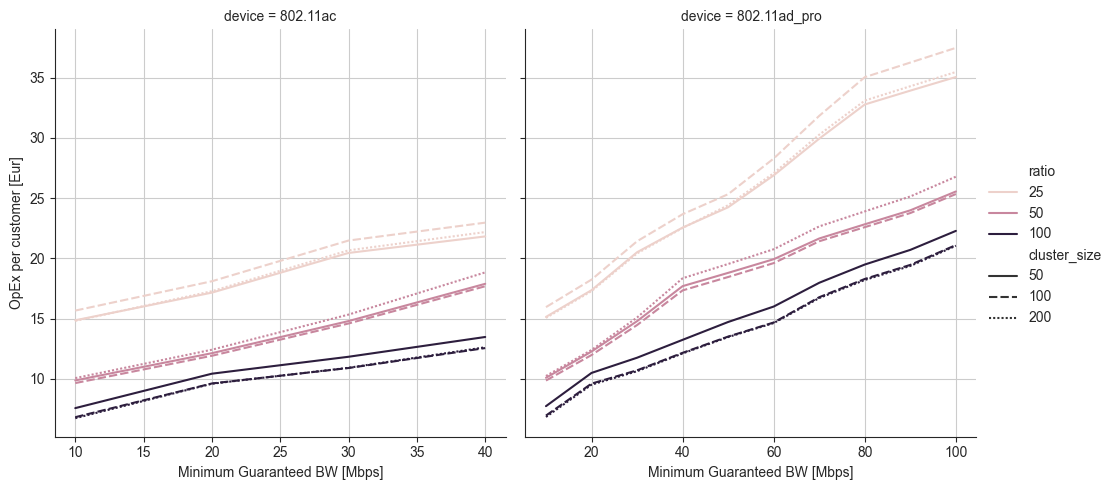

In [18]:
costs_df['opex_min'] = (costs_df['sum_min']-costs_df['capex_min']).to_frame(name="opex")
costs_df['opex_max'] = (costs_df['sum_max']-costs_df['capex_max']).to_frame(name="opex")


fg = sns.relplot(data=costs_df, x='mgb', hue='ratio', kind='line', col='device', y='opex_min', style='cluster_size',facet_kws={'sharey': True, 'sharex': False})
sns.set_style("ticks",{'axes.grid' : True})

fg.set_ylabels("OpEx per customer [Eur]")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")


plt.savefig("figures/opex.pdf")


costs_df['leo'] = (costs_df['fiber_cost_ci'] + costs_df['transport_cost_ci'] + costs_df['unplanned_cost_ci'] + costs_df['power_consumption_ci'] + costs_df['capex_ci']) /costs_df['correct_sum']



/home/gabriel/Envs/odcm/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


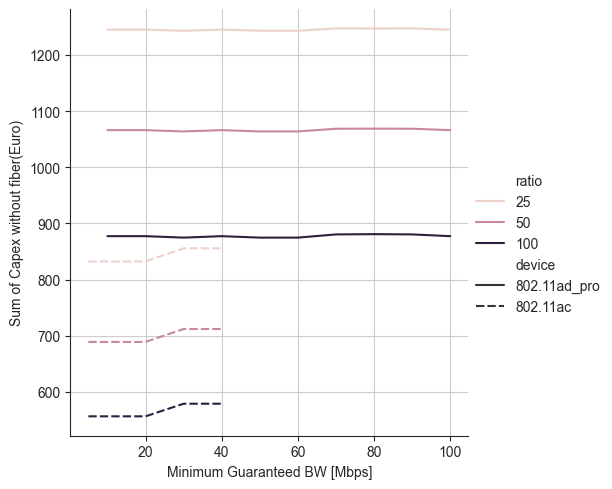

In [7]:

t_df = capex_df.set_index(['area', 'ratio', 'cluster_size', 'mgb', 'device'])
pvt = capex_df.pivot_table(index=['area', 'ratio', 'cluster_size', 'mgb', 'device'], columns='type_cost', values='5ymontlycostcustomer')
pvt['mesh_cost'] = (pvt.deploy + pvt.radio_cost + pvt.router_cost)*60

new_df = pvt.mesh_cost.reset_index()

fg = sns.relplot(data=new_df[((new_df.cluster_size==50) & (new_df.device=='802.11ad_pro') & (new_df.mgb<=100)) | (new_df.cluster_size==100) & (new_df.device=='802.11ac')], x='mgb', hue='ratio', y='mesh_cost', kind='line', style="device",facet_kws={'sharey': True, 'sharex': False}, ci=None)
fg.set_ylabels("Sum of Capex without fiber(Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("figures/capex_nofiber.pdf")

In [8]:
capex_df

,#,nodes,n_gw,cost,algo,cost_customer,5ymontlycostcustomer,type_cost,area,ratio,cluster_size,time,seed,mgb,device
0,0,268,1,44500.000,dijkstra,126.062323,2.101039,router_cost,fauglia,25,200,17128264335,50,10,802.11ac
1,1,268,1,146600.000,dijkstra,415.297450,6.921624,deploy,fauglia,25,200,17128264335,50,10,802.11ac
2,2,268,1,53100.000,dijkstra,150.424929,2.507082,radio_cost,fauglia,25,200,17128264335,50,10,802.11ac
3,3,268,1,11709.188,dijkstra,33.170504,0.552842,fiber_cost,fauglia,25,200,17128264335,50,10,802.11ac
4,4,268,1,44500.000,dijkstra,126.062323,2.101039,router_cost,fauglia,25,200,17128264335,50,10,802.11ac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53047,53047,693,1,38908.666,dijkstra,28.317806,0.471963,fiber_cost,fauglia,100,50,17128287182,50,30,802.11ad_pro
53048,53048,693,1,231500.000,dijkstra,168.486172,2.808103,router_cost,fauglia,100,50,17128287182,50,30,802.11ad_pro
53049,53049,693,1,603100.000,dijkstra,438.937409,7.315623,deploy,fauglia,100,50,17128287182,50,30,802.11ad_pro
53050,53050,693,1,381010.000,dijkstra,277.299854,4.621664,radio_cost,fauglia,100,50,17128287182,50,30,802.11ad_pro


In [101]:
aggreg_capex = capex_df.groupby(['ratio', 'type_cost', 'mgb', 'device', 'cluster_size'])[['cost_customer_min', 'cost_customer_max']].mean()

aggreg_capex.reset_index(inplace=True)
aggreg_capex['ratio'] = pd.Categorical(aggreg_capex['ratio'].astype(str), [str(x) for x in sorted(aggreg_capex.ratio.unique())])
aggreg_capex['cost_customer_mid'] = (aggreg_capex['cost_customer_max'] + aggreg_capex['cost_customer_min'])/2
aggreg_capex['cost_customer_devation'] = (aggreg_capex['cost_customer_max'] - aggreg_capex['cost_customer_min'])/2


mgbs = [[5,20], [40,80]]
cs = [100,50]
for idx, device in enumerate(['802.11ac', '802.11ad_pro']):
    for jdx, mgb in enumerate(mgbs[idx]):
        toplot = aggreg_capex[(aggreg_capex.mgb==mgb) & (aggreg_capex.device==device) & (aggreg_capex.cluster_size==cs[idx])]
        tosave = toplot.groupby(["ratio", "type_cost"])[['cost_customer_mid', 'cost_customer_devation']].mean().unstack("type_cost")
        tosave.columns = [f"{c[0].split("_")[2]}_{c[1]}" for c in tosave.columns]
        tosave.to_csv(f"latex_figures/capex_{device}_{mgb}.csv")

aggreg_capex.groupby(["ratio", "type_cost", "device", "mgb"])[['cost_customer_mid', 'cost_customer_devation']].mean().unstack("type_cost").to_csv(f"latex_figures/capex_all.csv")


/tmp/ipykernel_1323439/3089251346.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tosave = toplot.groupby(["ratio", "type_cost"])[['cost_customer_mid', 'cost_customer_devation']].mean().unstack("type_cost")
/tmp/ipykernel_1323439/3089251346.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tosave = toplot.groupby(["ratio", "type_cost"])[['cost_customer_mid', 'cost_customer_devation']].mean().unstack("type_cost")
/tmp/ipykernel_1323439/3089251346.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cur

In [81]:
test = capex_df[capex_df.mgb<=80].groupby(['mgb', 'ratio', 'cluster_size', 'device', 'type_cost']).cost.mean().unstack("type_cost")
test['sum'] = test['deploy'] + test['fiber_cost'] + test['radio_cost'] + test['router_cost']
test.iloc[test['sum'].argmax()]

type_cost
deploy         5.356682e+05
fiber_cost     5.756877e+04
radio_cost     3.449083e+05
router_cost    1.964666e+05
sum            1.134612e+06
Name: (80, 100, 50, 802.11ad_pro), dtype: float64

In [139]:
sns.set_style("ticks",{'axes.grid' : True})
costs_df_loc = costs_df.reset_index()
# fg = sns.relplot(data=costs_df[((costs_df.cluster_size==50) & (costs_df.device=='802.11ad_pro') & (costs_df.mgb<=100)) | (costs_df.cluster_size==100) & (costs_df.device=='802.11ac')], x='mgb', hue='ratio', y='correct_sum', kind='line', style="device",facet_kws={'sharey': True, 'sharex': False})

# fg.set_ylabels("Sum (Euro)")
# fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
# plt.savefig("figures/costs_adac_trend.pdf")
cloc = costs_df_loc[((costs_df_loc.cluster_size==50) & (costs_df_loc.device=='802.11ad_pro') & (costs_df_loc.mgb<=100)) | (costs_df_loc.cluster_size==100) & (costs_df_loc.device=='802.11ac')]

cloc['sum_sat_min'] = cloc['capex_sat_min'] + cloc['power_consumption_get_min'] + cloc['unplanned_cost_get_min']
cloc['sum_sat_max'] = cloc['capex_sat_max'] + cloc['power_consumption_get_max'] + cloc['unplanned_cost_get_max']


tosave = cloc.groupby(["mgb", "ratio", "device"])[['sum_min', 'sum_max', "sum_sat_min", "sum_sat_max"]].mean().unstack(["ratio", "device"])
tosave.columns = [f"{c[0]}_{c[1]}_{c[2]}" for c in tosave.columns]
tosave
tosave.to_csv("latex_figures/mgb_trend.csv")



# fg = sns.relplot(data=costs_df[], x='mgb', hue='ratio', y='correct_sum', kind='line', col='device',style="cluster_size",facet_kws={'sharey': True, 'sharex': False})

# fg.set_ylabels("Sum (Euro)")
# fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
# plt.savefig("figures/costs_ac.pdf")

/tmp/ipykernel_1323439/2760318491.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloc['sum_sat_min'] = cloc['capex_sat_min'] + cloc['power_consumption_get_min'] + cloc['unplanned_cost_get_min']
/tmp/ipykernel_1323439/2760318491.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloc['sum_sat_max'] = cloc['capex_sat_max'] + cloc['power_consumption_get_max'] + cloc['unplanned_cost_get_max']


In [69]:
local_costs_df = costs_df.reset_index()
mgbs = [[5,20], [40,80]]
cs = [100,50]

rotated_df = local_costs_df[[f'fiber_cost_get_max', f'transport_cost_get_max', f'unplanned_cost_get_max', f'power_consumption_get_max', f'capex_max', f'fiber_cost_get_min', f'transport_cost_get_min', f'unplanned_cost_get_min', f'power_consumption_get_min', f'capex_min', 'mgb', 'cluster_size', 'device', 'ratio']].melt(id_vars=['mgb','cluster_size', 'device', 'ratio'], var_name='cost_type')
rotated_df['ratio'] = pd.Categorical(rotated_df['ratio'].astype(str), [str(x) for x in sorted(rotated_df.ratio.unique())])

cost_type_map = {
    'fiber_cost_get_max': 'fiber_cost_mid',
    'fiber_cost_get_min': 'fiber_cost_mid',
    'transport_cost_get_max': 'transport_cost_mid',
    'transport_cost_get_min': 'transport_cost_mid',
    'unplanned_cost_get_max': 'unplanned_cost_mid',
    'unplanned_cost_get_min': 'unplanned_cost_mid', 
    'power_consumption_get_max': 'power_consumption_mid',
    'power_consumption_get_min': 'power_consumption_mid',
    'capex_max': 'capex_mid',
    'capex_min': 'capex_mid'

}

rotated_df['mid_dev_type'] = rotated_df['cost_type'].map(cost_type_map)
rotated_df['is_max'] = rotated_df['cost_type'].str.endswith('_max')

# Group by the necessary columns to calculate midpoint and deviation
grouped = rotated_df.groupby(['mgb', 'cluster_size', 'device', 'ratio', 'mid_dev_type', 'is_max'])
mid_dev_df = grouped.agg({'value': ['mean']})
mid_dev_df.columns = ['value']
mid_dev_df = mid_dev_df.reset_index()

# Create a pivot table to get max and min values side by side
pivot_df = mid_dev_df.pivot_table(
    index=['mgb', 'cluster_size', 'device', 'ratio', 'mid_dev_type'],
    columns='is_max',
    values='value'
).reset_index()

# Rename the columns
pivot_df.columns.name = None
pivot_df = pivot_df.rename(columns={True: 'max_value', False: 'min_value'})

# Calculate midpoint and deviation
pivot_df['midpoint'] = (pivot_df['max_value'] + pivot_df['min_value']) / 2
pivot_df['deviation'] = (pivot_df['max_value'] - pivot_df['min_value']) / 2

# Handle NaN values (for capex which only has max)
pivot_df['midpoint'] = pivot_df['midpoint'].fillna(pivot_df['max_value'])
pivot_df['deviation'] = pivot_df['deviation'].fillna(0)

# Create the final DataFrame with the required structure
final_df = pivot_df[['mgb', 'cluster_size', 'device', 'ratio', 'mid_dev_type', 'midpoint', 'deviation']]


for idx, device in enumerate(['802.11ac', '802.11ad_pro']):
        for jdx, mgb in enumerate(mgbs[idx]):
            toplot = final_df[(final_df.mgb==mgb) & (final_df.device==device) & (final_df.cluster_size==cs[idx])]
            tosave = toplot.pivot(index='ratio', columns='mid_dev_type', values=['midpoint', 'deviation'])
        
            # Flatten the multi-level columns
            tosave.columns = [f'{col[1]}_{col[0]}' for col in tosave.columns]
            
            # Save to CSV
            tosave.to_csv(f"latex_figures/costs_{device}_{mgb}.csv")

/tmp/ipykernel_1323439/1968077231.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = rotated_df.groupby(['mgb', 'cluster_size', 'device', 'ratio', 'mid_dev_type', 'is_max'])
/tmp/ipykernel_1323439/1968077231.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = mid_dev_df.pivot_table(


In [ ]:
local_costs_df = costs_df.reset_index()
mgbs = [[5,20], [40,80]]
cs = [100,50]

rotated_df = local_costs_df[[f'fiber_cost_get_max', f'transport_cost_get_max', f'unplanned_cost_get_max', f'power_consumption_get_max', f'capex_max', f'fiber_cost_get_min', f'transport_cost_get_min', f'unplanned_cost_get_min', f'power_consumption_get_min', f'capex_min', 'mgb', 'cluster_size', 'device', 'ratio']].melt(id_vars=['mgb','cluster_size', 'device', 'ratio'], var_name='cost_type')
rotated_df['ratio'] = pd.Categorical(rotated_df['ratio'].astype(str), [str(x) for x in sorted(rotated_df.ratio.unique())])

for idx, device in enumerate(['802.11ac', '802.11ad_pro']):
        for jdx, mgb in enumerate(mgbs[idx]):
            toplot = rotated_df[(rotated_df.mgb==mgb) & (rotated_df.device==device) & (rotated_df.cluster_size==cs[idx])]
            tosave = toplot.groupby(["ratio", "cost_type"])['value'].mean().unstack("cost_type")
            tosave.to_csv(f"latex_figures/costs_{device}_{mgb}.csv")

/tmp/ipykernel_1323439/1588325226.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tosave = toplot.groupby(["ratio", "cost_type"])['value'].mean().unstack("cost_type")
/tmp/ipykernel_1323439/1588325226.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tosave = toplot.groupby(["ratio", "cost_type"])['value'].mean().unstack("cost_type")
/tmp/ipykernel_1323439/1588325226.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warn

In [108]:
local_costs_df = costs_df.reset_index()
mgbs = [[5,20], [40,80]]
cs = [100,50]

rotated_df = local_costs_df[['unplanned_cost_get_max', 'power_consumption_get_max', 'capex_sat_max', 'unplanned_cost_get_min', 'power_consumption_get_min', 'capex_sat_min', 'mgb', 'cluster_size', 'device', 'ratio']].melt(id_vars=['mgb','cluster_size', 'device', 'ratio'], var_name='cost_type')
rotated_df['ratio'] = pd.Categorical(rotated_df['ratio'].astype(str), [str(x) for x in sorted(rotated_df.ratio.unique())])

cost_type_map = {
    'unplanned_cost_get_max': 'unplanned_cost_mid',
    'unplanned_cost_get_min': 'unplanned_cost_mid', 
    'power_consumption_get_max': 'power_consumption_mid',
    'power_consumption_get_min': 'power_consumption_mid',
    'capex_sat_max': 'capex_sat_mid',
    'capex_sat_min': 'capex_sat_mid'

}

rotated_df['mid_dev_type'] = rotated_df['cost_type'].map(cost_type_map)
rotated_df['is_max'] = rotated_df['cost_type'].str.endswith('_max')

# Group by the necessary columns to calculate midpoint and deviation
grouped = rotated_df.groupby(['mgb', 'cluster_size', 'device', 'ratio', 'mid_dev_type', 'is_max'])
mid_dev_df = grouped.agg({'value': ['mean']})
mid_dev_df.columns = ['value']
mid_dev_df = mid_dev_df.reset_index()

# Create a pivot table to get max and min values side by side
pivot_df = mid_dev_df.pivot_table(
    index=['mgb', 'cluster_size', 'device', 'ratio', 'mid_dev_type'],
    columns='is_max',
    values='value'
).reset_index()

# Rename the columns
pivot_df.columns.name = None
pivot_df = pivot_df.rename(columns={True: 'max_value', False: 'min_value'})

# Calculate midpoint and deviation
pivot_df['midpoint'] = (pivot_df['max_value'] + pivot_df['min_value']) / 2
pivot_df['deviation'] = (pivot_df['max_value'] - pivot_df['min_value']) / 2

# Handle NaN values (for capex which only has max)
pivot_df['midpoint'] = pivot_df['midpoint'].fillna(pivot_df['max_value'])
pivot_df['deviation'] = pivot_df['deviation'].fillna(0)

# Create the final DataFrame with the required structure
final_df = pivot_df[['mgb', 'cluster_size', 'device', 'ratio', 'mid_dev_type', 'midpoint', 'deviation']]


for idx, device in enumerate(['802.11ac', '802.11ad_pro']):
        for jdx, mgb in enumerate(mgbs[idx]):
            toplot = final_df[(final_df.mgb==mgb) & (final_df.device==device) & (final_df.cluster_size==cs[idx])]
            tosave = toplot.pivot(index='ratio', columns='mid_dev_type', values=['midpoint', 'deviation'])
        
            # Flatten the multi-level columns
            tosave.columns = [f'{col[1]}_{col[0]}' for col in tosave.columns]
            
            # Save to CSV
            tosave["sum_mid_midpoint"] = tosave.capex_sat_mid_midpoint + tosave.power_consumption_mid_midpoint + tosave.unplanned_cost_mid_midpoint
            tosave["sum_mid_deviation"] = tosave.capex_sat_mid_deviation + tosave.power_consumption_mid_deviation + tosave.unplanned_cost_mid_deviation
            tosave.to_csv(f"latex_figures/costs_nofiber_{device}_{mgb}.csv")

/tmp/ipykernel_1323439/4154839792.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = rotated_df.groupby(['mgb', 'cluster_size', 'device', 'ratio', 'mid_dev_type', 'is_max'])
/tmp/ipykernel_1323439/4154839792.py:28: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = mid_dev_df.pivot_table(


In [ ]:
local_costs_df = costs_df.reset_index()
mgbs = [[5,20], [40,80]]
cs = [100,50]

rotated_df = local_costs_df[[f'unplanned_cost_get_max', f'power_consumption_get_max', f'capex_sat_max', f'unplanned_cost_get_min', f'power_consumption_get_min', f'capex_sat_max', 'mgb', 'cluster_size', 'device', 'ratio']].melt(id_vars=['mgb','cluster_size', 'device', 'ratio'], var_name='cost_type')
rotated_df['ratio'] = pd.Categorical(rotated_df['ratio'].astype(str), [str(x) for x in sorted(rotated_df.ratio.unique())])

for idx, device in enumerate(['802.11ac', '802.11ad_pro']):
        for jdx, mgb in enumerate(mgbs[idx]):
            toplot = rotated_df[(rotated_df.mgb==mgb) & (rotated_df.device==device) & (rotated_df.cluster_size==cs[idx])]
            tosave = toplot.groupby(["ratio", "cost_type"])['value'].mean().unstack("cost_type")
            tosave.to_csv(f"latex_figures/costs_nofiber_{device}_{mgb}.csv")

/tmp/ipykernel_1323439/1671968619.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tosave = toplot.groupby(["ratio", "cost_type"])['value'].mean().unstack("cost_type")
/tmp/ipykernel_1323439/1671968619.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tosave = toplot.groupby(["ratio", "cost_type"])['value'].mean().unstack("cost_type")
/tmp/ipykernel_1323439/1671968619.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warn

802.11ac 5
802.11ac 20
802.11ad_pro 40


/tmp/ipykernel_2304840/228349146.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tosave = (rotated_df[(rotated_df.mgb==mgb) & (rotated_df.device==device) & (rotated_df.cluster_size==cs[idx])].groupby(['ratio', 'cost_type']).value.mean().unstack("cost_type"))
/tmp/ipykernel_2304840/228349146.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tosave = (rotated_df[(rotated_df.mgb==mgb) & (rotated_df.device==device) & (rotated_df.cluster_size==cs[idx])].groupby(['ratio', 'cost_type']).value.mean().unstack("cost_type"))
/tmp/ipykernel_2304840/228349146.py:19: FutureWarning: The default of observed=False is 

802.11ad_pro 80


/tmp/ipykernel_2304840/228349146.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tosave = (rotated_df[(rotated_df.mgb==mgb) & (rotated_df.device==device) & (rotated_df.cluster_size==cs[idx])].groupby(['ratio', 'cost_type']).value.mean().unstack("cost_type"))


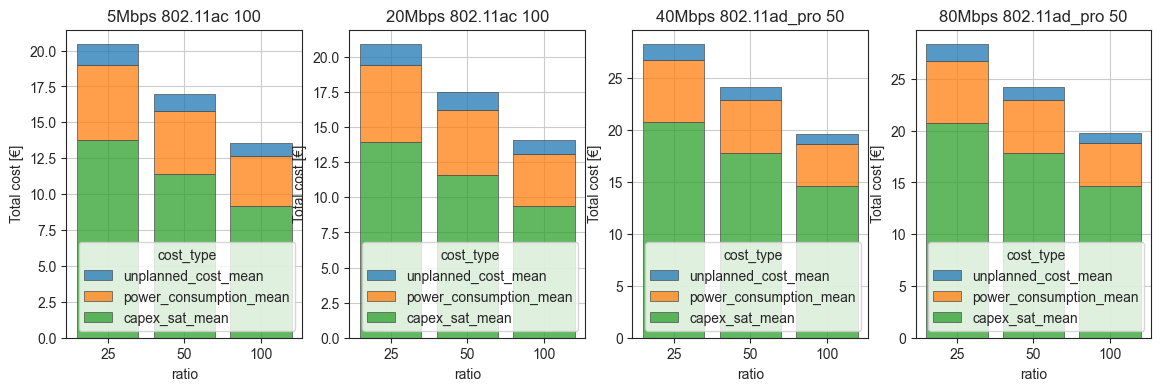

In [15]:
rotated_df = costs_df[['unplanned_cost_mean', 'power_consumption_mean', 'capex_sat_mean', 'mgb', 'cluster_size', 'device', 'ratio']].melt(id_vars=['mgb','cluster_size', 'device', 'ratio'], var_name='cost_type')

rotated_df['ratio'] = pd.Categorical(rotated_df['ratio'].astype(str), [str(x) for x in sorted(rotated_df.ratio.unique())])

plt.rcParams['figure.figsize'] = [14, 4]

mgbs = [[5,20], [40,80]]
cs = [100,50]
for idx, device in enumerate(['802.11ac', '802.11ad_pro']):
    for jdx, mgb in enumerate(mgbs[idx]):
        ax = plt.subplot(1,4,2*idx+jdx+1)
        ax.grid(True)
        sns.histplot(data=rotated_df[(rotated_df.mgb==mgb) & (rotated_df.device==device) & (rotated_df.cluster_size==cs[idx])], x='ratio', hue='cost_type', multiple="stack", edgecolor=".3", linewidth=.5, discrete=True, weights='value', shrink=0.8, ax=ax)
        ax.set_ylabel("Total cost [€]")
        ax.set_title(f"{mgb}Mbps {device} {cs[idx]}")
        ax.set_ylabel("Total cost [€]")
        sns.move_legend(ax, 'lower right')
        print(device,mgb)
        tosave = (rotated_df[(rotated_df.mgb==mgb) & (rotated_df.device==device) & (rotated_df.cluster_size==cs[idx])].groupby(['ratio', 'cost_type']).value.mean().unstack("cost_type"))
        tosave["sum"] = tosave.capex_sat_mean + tosave.power_consumption_mean + tosave.unplanned_cost_mean 
        tosave.to_csv(f"latex_figures/costs_nofiber_{device}_{mgb}.csv")


plt.savefig('figures/costs_acad_nofiber.pdf')


['fiber_cost_mean' 'transport_cost_mean' 'unplanned_cost_mean'
 'power_consumption_mean' 'capex_mean']


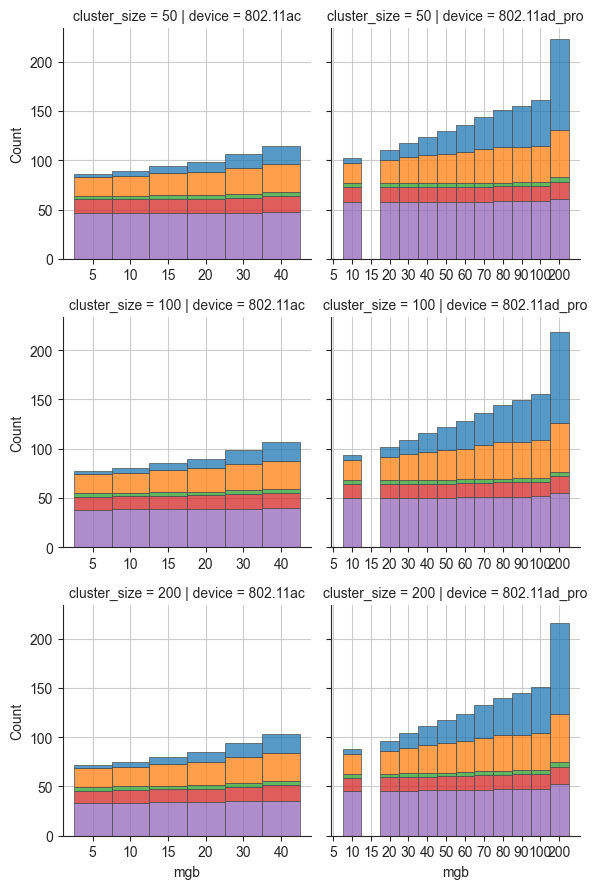

In [16]:
rotated_df = costs_df[['fiber_cost_mean', 'transport_cost_mean', 'unplanned_cost_mean', 'power_consumption_mean', 'capex_mean', 'mgb', 'cluster_size', 'device', 'ratio']].melt(id_vars=['mgb','cluster_size', 'device', 'ratio'], var_name='cost_type')

rotated_df['mgb'] = pd.Categorical(rotated_df['mgb'].astype(str), [str(x) for x in sorted(rotated_df.mgb.unique())])
print(rotated_df.cost_type.unique())
fg = sns.FacetGrid(data=rotated_df, row='cluster_size', col='device', sharex=False)
fg.map_dataframe(sns.histplot, x='mgb', hue='cost_type', multiple="stack", edgecolor=".3", linewidth=.5, discrete=True, weights='value')

p = plt.xticks(rotated_df.mgb.unique())

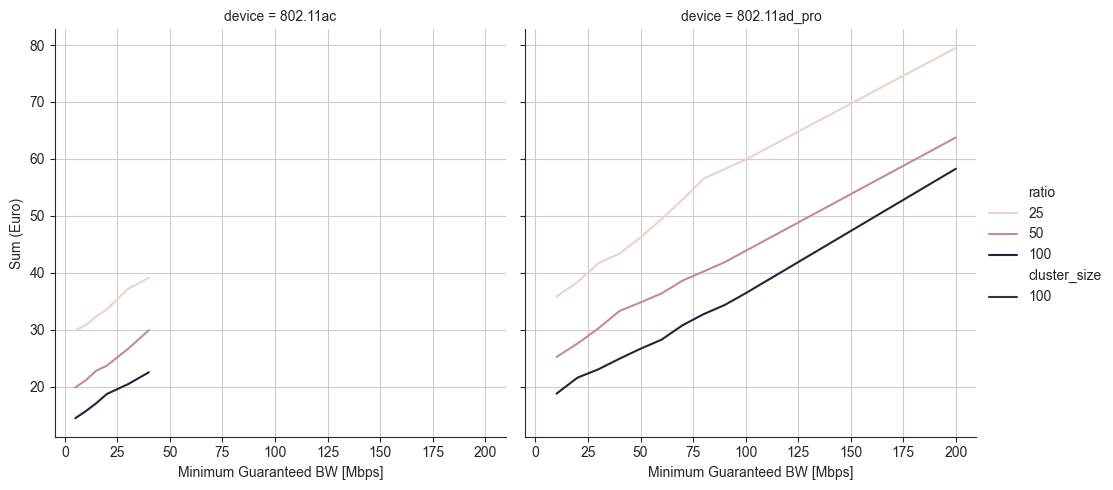

In [17]:
sns.set_style("ticks",{'axes.grid' : True})
#costs_df.reset_index(inplace=True)
fg = sns.relplot(data=costs_df[(costs_df.cluster_size==100)], x='mgb', col='device', hue='ratio', y='sum', kind='line',style="cluster_size",facet_kws={'sharey': True, 'sharex': True})

fg.set_ylabels("Sum (Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/costs.pdf")

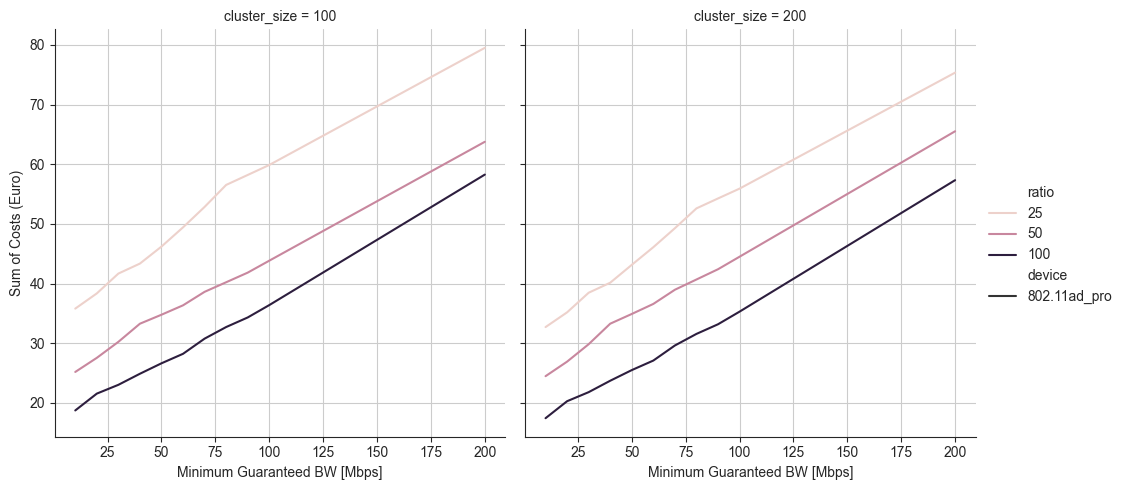

In [18]:
#sns.set_style("ticks",{'axes.grid' : True
#costs_df.reset_index(inplace=True)
fg = sns.relplot(data=costs_df[(costs_df.cluster_size>=100) & (costs_df.device=='802.11ad_pro')], x='mgb', hue='ratio', y='sum', kind='line', style='device',col="cluster_size")
fg.set_ylabels("Sum of Costs (Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")



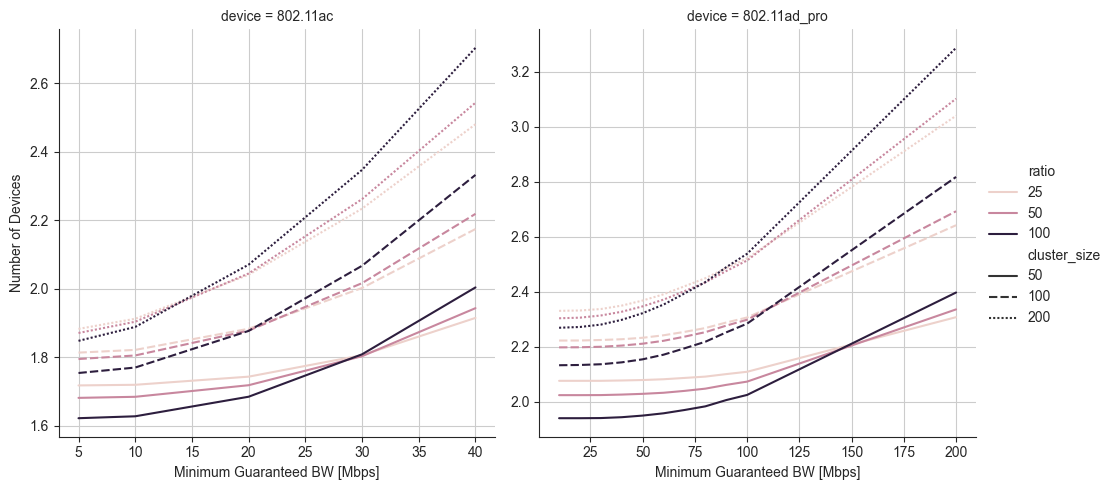

In [19]:
sns.set_style("ticks",{'axes.grid' : True})
fg = sns.relplot(data=n_ant_df[n_ant_df.type=='relay'], x='mgb', hue='ratio', kind='line', style='cluster_size', y='antennae', col='device', facet_kws={'sharey': False, 'sharex': False})
fg.set_ylabels("Number of Devices")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")

# axes = fg.axes.flatten()
# axes[0].axhline(y=12, c='red', linestyle='dashed', label="horizontal")
# axes[1].axhline(y=4, c='red', linestyle='dashed', label="horizontal")


#plt.axhline(y=7, c='red', linestyle='dashed', label="horizontal")
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/n_ant_relay.pdf")


802.11ac
802.11ad_pro


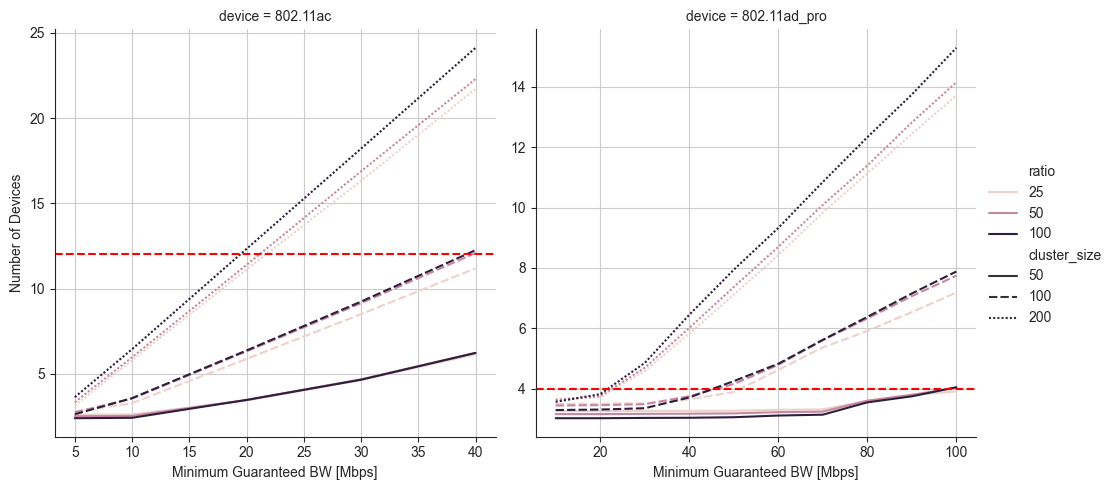

In [20]:
sns.set_style("ticks",{'axes.grid' : True})
fg = sns.relplot(data=n_ant_df[(n_ant_df.type=='gw') & (n_ant_df.mgb<=100)], x='mgb', hue='ratio', kind='line', style='cluster_size', y='antennae', col='device', facet_kws={'sharey': False, 'sharex': False})
fg.set_ylabels("Number of Devices")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
axes = fg.axes.flatten()
axes[0].axhline(y=12, c='red', linestyle='dashed', label="horizontal")
#axes[0].set_ylim(1,25)

axes[1].axhline(y=4, c='red', linestyle='dashed', label="horizontal")
#axes[1].set_ylim(1,16)


#plt.axhline(y=7, c='red', linestyle='dashed', label="horizontal")
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/n_ant_gw.pdf")

n_ant_df.reset_index()
for d in ['802.11ac', '802.11ad_pro']:
    print(d)
    tosave = n_ant_df[(n_ant_df.type=='gw') & (n_ant_df.mgb<=100) & (n_ant_df.device==d)].groupby(["mgb", "ratio", "cluster_size"]).antennae.mean().unstack(["ratio", "cluster_size"])
    tosave.columns = [f"ratio{c[0]}_cs{c[1]}" for c in tosave.columns]
    tosave.to_csv(f"latex_figures/mgb_{d}.csv")



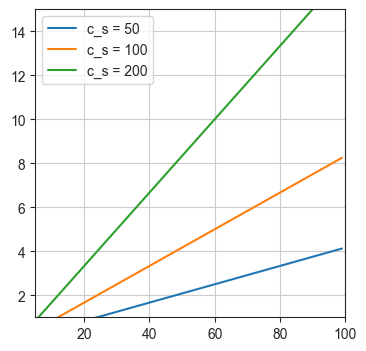

In [21]:
plt.figure(figsize=(4,4))

def get_ant(n_subs, n_gw, mgb):
    return n_subs*mgb/(n_gw*1200)

x = np.arange(0,100)

for c_s in [50,100,200]:
    y=get_ant(813,813/c_s , x)
    plt.plot(x,y, label=f"c_s = {c_s}")
    plt.xlim(5,100)
    plt.ylim(1,15)

plt.legend()

In [22]:
n_ant_df

,type,cluster_size,ratio,antennae,mgb,device
0,gw,50,25,2.611502,10,802.11ac
1,gw,50,50,2.525239,10,802.11ac
2,gw,50,100,2.415332,10,802.11ac
3,gw,100,25,3.275069,10,802.11ac
4,gw,100,50,3.541687,10,802.11ac
...,...,...,...,...,...,...
22,relay,100,50,2.204427,40,802.11ad_pro
23,relay,100,100,2.143472,40,802.11ad_pro
24,relay,200,25,2.349813,40,802.11ad_pro
25,relay,200,50,2.327519,40,802.11ad_pro


<Figure size 400x400 with 0 Axes>

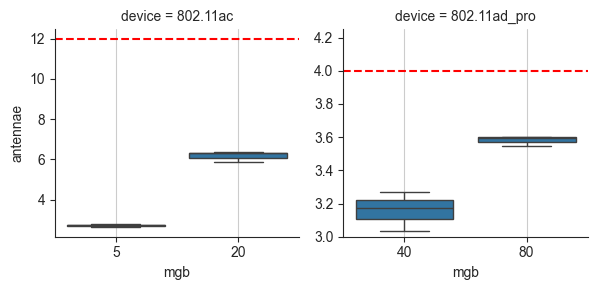

In [23]:
#We don't like this plot
plt.figure(figsize=(4,4))
n_ant_df_local = n_ant_df[(n_ant_df.type=='gw') & ((((n_ant_df.mgb == 5) | (n_ant_df.mgb == 20)) & (n_ant_df.device=='802.11ac') & (n_ant_df.cluster_size==100)) | (((n_ant_df.mgb==40) | (n_ant_df.mgb==80)) & (n_ant_df.device=='802.11ad_pro') & (n_ant_df.cluster_size==50)))]

fg= sns.FacetGrid(data=n_ant_df_local, col='device', sharey=False, sharex=False)
fg.map_dataframe(sns.boxplot, x='mgb', y='antennae')
axes = fg.axes.flatten()
axes[0].grid()
#axes[0].set_ylim(0,12.1)
axes[1].grid()
axes[0].axhline(y=12, c='red', linestyle='dashed', label="horizontal")
#axes[0].set_ylim(1,25)

axes[1].axhline(y=4, c='red', linestyle='dashed', label="horizontal")
axes[1].set_ylim(3,4.25)
#axes[1].set_ylim(1,16)
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/ant_boxplot.pdf")


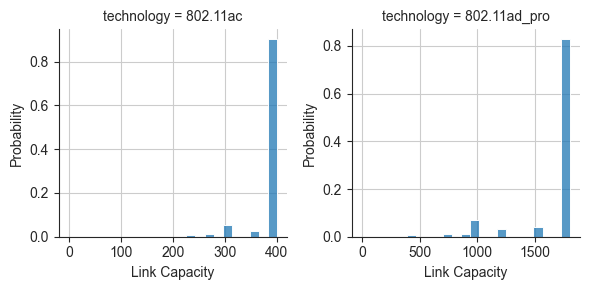

In [82]:

dfs = []
for dev in ['802.11ac', '802.11ad_pro']:
    df = pd.read_csv(f'processed/{dev}/lc.csv', names=['id', 'cap']).set_index('id')
    df['technology'] = dev
    df['Link Capacity'] = df.cap
    dfs.append(df)
df = pd.concat(dfs)

fg = sns.FacetGrid(df, col='technology', sharex=False, sharey=False)
fg.map_dataframe(sns.histplot, x='Link Capacity', stat='probability', common_norm=True)
plt.savefig('/home/gabriel/git/ODCM/analysis/figures/link_capacity_hist.pdf')

In [96]:
t = '802.11ac'
m = df[(df.technology==t)]['Link Capacity'].max()
len(df[(df.technology==t)&(df['Link Capacity'] == m)])/len(df[(df.technology==t)])

0.9026325610066833